### 데이터 구간을 더 세부적으로 쪼개기

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate, Activation

In [2]:
df = pd.read_csv('./train.csv')

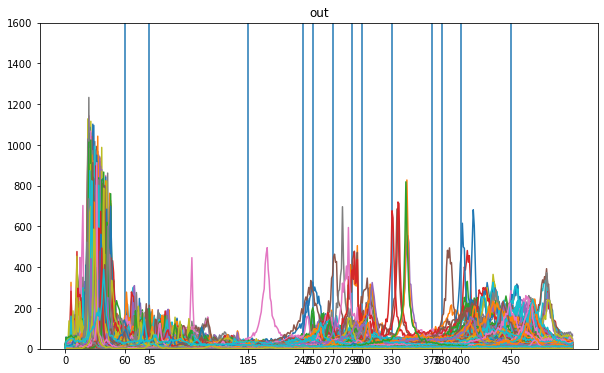

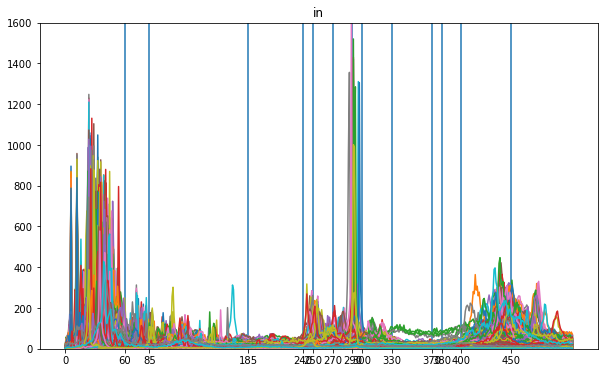

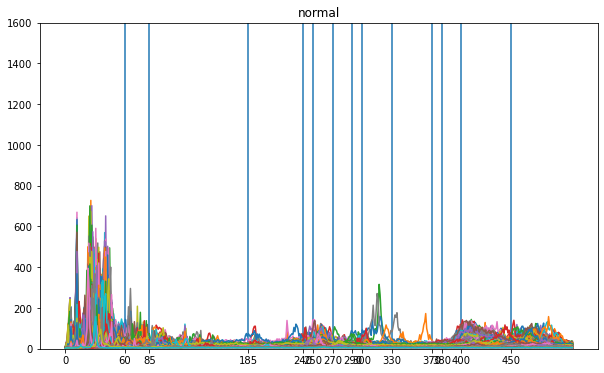

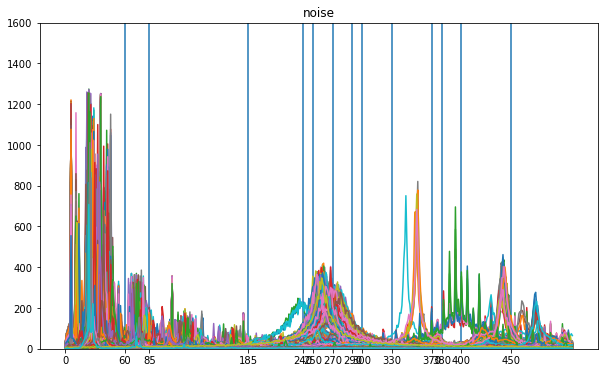

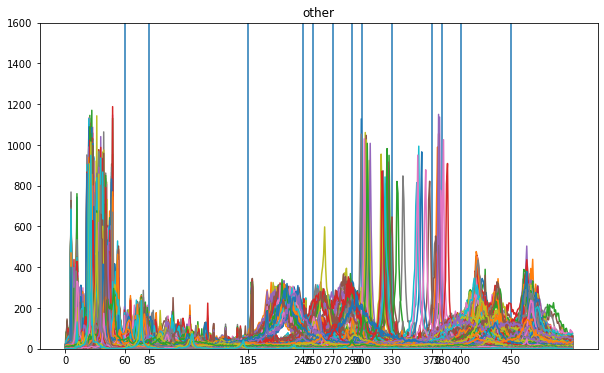

In [3]:
import matplotlib.pyplot as plt

#전체 데이터셋에서 x축 확인 

plt.figure(figsize=(10,6))
plt.axvline(x=60)
plt.axvline(x=85)
plt.axvline(x=185)
plt.axvline(x=240)
plt.axvline(x=250)
plt.axvline(x=270)
plt.axvline(x=290)
plt.axvline(x=300)
plt.axvline(x=330)
plt.axvline(x=370)
plt.axvline(x=380)
plt.axvline(x=400)
plt.axvline(x=450)
plt.ylim(0,1600)
plt.xticks([0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450], 
           [0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450])
tmp_df = df.groupby('leaktype').get_group('out')
for i in range(len(tmp_df)):
    plt.plot(tmp_df.iloc[i,1:])
plt.title('out')
plt.show()

plt.figure(figsize=(10,6))
plt.axvline(x=60)
plt.axvline(x=85)
plt.axvline(x=185)
plt.axvline(x=240)
plt.axvline(x=250)
plt.axvline(x=270)
plt.axvline(x=290)
plt.axvline(x=300)
plt.axvline(x=330)
plt.axvline(x=370)
plt.axvline(x=380)
plt.axvline(x=400)
plt.axvline(x=450)
plt.ylim(0,1600)
plt.xticks([0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450], 
           [0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450])
tmp_df = df.groupby('leaktype').get_group('in')
for i in range(len(tmp_df)):
    plt.plot(tmp_df.iloc[i,1:])
plt.title('in')
plt.show()

plt.figure(figsize=(10,6))
plt.axvline(x=60)
plt.axvline(x=85)
plt.axvline(x=185)
plt.axvline(x=240)
plt.axvline(x=250)
plt.axvline(x=270)
plt.axvline(x=290)
plt.axvline(x=300)
plt.axvline(x=330)
plt.axvline(x=370)
plt.axvline(x=380)
plt.axvline(x=400)
plt.axvline(x=450)
plt.ylim(0,1600)
plt.xticks([0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450], 
           [0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450])
tmp_df = df.groupby('leaktype').get_group('normal')
for i in range(len(tmp_df)):
    plt.plot(tmp_df.iloc[i,1:])
plt.title('normal')
plt.show()

plt.figure(figsize=(10,6))
plt.axvline(x=60)
plt.axvline(x=85)
plt.axvline(x=185)
plt.axvline(x=240)
plt.axvline(x=250)
plt.axvline(x=270)
plt.axvline(x=290)
plt.axvline(x=300)
plt.axvline(x=330)
plt.axvline(x=370)
plt.axvline(x=380)
plt.axvline(x=400)
plt.axvline(x=450)
plt.ylim(0,1600)
plt.xticks([0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450], 
           [0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450])
tmp_df = df.groupby('leaktype').get_group('noise')
for i in range(len(tmp_df)):
    plt.plot(tmp_df.iloc[i,1:])
plt.title('noise')
plt.show()

plt.figure(figsize=(10,6))
plt.axvline(x=60)
plt.axvline(x=85)
plt.axvline(x=185)
plt.axvline(x=240)
plt.axvline(x=250)
plt.axvline(x=270)
plt.axvline(x=290)
plt.axvline(x=300)
plt.axvline(x=330)
plt.axvline(x=370)
plt.axvline(x=380)
plt.axvline(x=400)
plt.axvline(x=450)
plt.ylim(0,1600)
plt.xticks([0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450], 
           [0, 60, 85, 185, 240, 250, 270, 290, 300, 330, 370, 380, 400, 450])
tmp_df = df.groupby('leaktype').get_group('other')
for i in range(len(tmp_df)):
    plt.plot(tmp_df.iloc[i,1:])
plt.title('other')
plt.show()

### 구간별 특징을 모두 잡아내기 위해 구간을 중복으로 지정해 학습 진행
### 16개의 구간으로 설정

### 모델 학습

In [73]:
df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

In [74]:
#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

In [75]:
#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

In [76]:
#other : 0, noise : 1, normal : 2, in : 3, out : 4

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

In [77]:
#from dataframe to numpy

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

In [78]:
#split train datasets and validation datasets

split = 0.2

test_num = int(split*len(label_np))

x_valid = feature_np[0:test_num]
y_valid = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

In [79]:
#one-hot encoding

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [80]:
# train, test dataset을 0-60, 60-85, 185-250, 185-330, 370-, 240-300, 380-, 185-330, 330-370, 370-450,
# 250-270, 250-300, 290-400, 400-450, 450-, 185-250 구간으로 나누기

df1_x_train = x_train[:, 0:60]
df2_x_train = x_train[:, 60:85]
df3_x_train = x_train[:, 185:250]
df4_x_train = x_train[:, 185:330]
df5_x_train = x_train[:, 370:]
df6_x_train = x_train[:, 240:300]
df7_x_train = x_train[:, 380:]
df8_x_train = x_train[:, 185:330]
df9_x_train = x_train[:, 330:370]
df10_x_train = x_train[:, 370:450]
df11_x_train = x_train[:, 250:270]
df12_x_train = x_train[:, 250:300]
df13_x_train = x_train[:, 290:400]
df14_x_train = x_train[:, 400:450]
df15_x_train = x_train[:, 450:]
df16_x_train = x_train[:, 185:250]

df1_x_valid = x_valid[:, 0:60]
df2_x_valid = x_valid[:, 60:85]
df3_x_valid = x_valid[:, 185:250]
df4_x_valid = x_valid[:, 185:330]
df5_x_valid = x_valid[:, 370:]
df6_x_valid = x_valid[:, 240:300]
df7_x_valid = x_valid[:, 380:]
df8_x_valid = x_valid[:, 185:330]
df9_x_valid = x_valid[:, 330:370]
df10_x_valid = x_valid[:, 370:450]
df11_x_valid = x_valid[:, 250:270]
df12_x_valid = x_valid[:, 250:300]
df13_x_valid = x_valid[:, 290:400]
df14_x_valid = x_valid[:, 400:450]
df15_x_valid = x_valid[:, 450:]
df16_x_valid = x_valid[:, 185:250]

### 각 데이터 구간별 모델 생성

In [81]:
#df1-16에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))

df1_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df1_input)
df1_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df1_layer)
df1_layer = MaxPooling1D(pool_size=4, padding='same')(df1_layer)
df1_layer = Dropout(0.7)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_layer = Dense(32)(df1_layer)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Activation('relu')(df1_layer)
df1_layer = Dropout(0.7)(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

In [82]:
df2_input = Input(shape=(df2_x_train.shape[1],1))

df2_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df2_input)
df2_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df2_layer)
df2_layer = MaxPooling1D(pool_size=4, padding='same')(df2_layer)
df2_layer = Dropout(0.7)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_layer = Dense(32)(df2_layer)
df2_layer = BatchNormalization()(df2_layer)
df2_layer = Activation('relu')(df2_layer)
df2_layer = Dropout(0.7)(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

In [83]:
df3_input = Input(shape=(df3_x_train.shape[1],1))

df3_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df3_input)
df3_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df3_layer)
df3_layer = MaxPooling1D(pool_size=4, padding='same')(df3_layer)
df3_layer = Dropout(0.7)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_layer = Dense(32)(df3_layer)
df3_layer = BatchNormalization()(df3_layer)
df3_layer = Activation('relu')(df3_layer)
df3_layer = Dropout(0.7)(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

In [84]:
df4_input = Input(shape=(df4_x_train.shape[1],1))

df4_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df4_input)
df4_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df4_layer)
df4_layer = MaxPooling1D(pool_size=4, padding='same')(df4_layer)
df4_layer = Dropout(0.7)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_layer = Dense(32)(df4_layer)
df4_layer = BatchNormalization()(df4_layer)
df4_layer = Activation('relu')(df4_layer)
df4_layer = Dropout(0.7)(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

In [85]:
df5_input = Input(shape=(df5_x_train.shape[1],1))

df5_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df5_input)
df5_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df5_layer)
df5_layer = MaxPooling1D(pool_size=4, padding='same')(df5_layer)
df5_layer = Dropout(0.7)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_layer = Dense(32)(df5_layer)
df5_layer = BatchNormalization()(df5_layer)
df5_layer = Activation('relu')(df5_layer)
df5_layer = Dropout(0.7)(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

In [86]:
df6_input = Input(shape=(df6_x_train.shape[1],1))

df6_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df6_input)
df6_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df6_layer)
df6_layer = MaxPooling1D(pool_size=4, padding='same')(df6_layer)
df6_layer = Dropout(0.7)(df6_layer)
df6_layer = Flatten()(df6_layer)
df6_layer = Dense(32)(df6_layer)
df6_layer = BatchNormalization()(df6_layer)
df6_layer = Activation('relu')(df6_layer)
df6_layer = Dropout(0.7)(df6_layer)
df6_model = Model(inputs=df6_input, outputs=df6_layer)

In [90]:
df7_input = Input(shape=(df7_x_train.shape[1],1))

df7_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df7_input)
df7_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df7_layer)
df7_layer = MaxPooling1D(pool_size=4, padding='same')(df7_layer)
df7_layer = Dropout(0.7)(df7_layer)
df7_layer = Flatten()(df7_layer)
df7_layer = Dense(32)(df7_layer)
df7_layer = BatchNormalization()(df7_layer)
df7_layer = Activation('relu')(df7_layer)
df7_layer = Dropout(0.7)(df7_layer)
df7_model = Model(inputs=df7_input, outputs=df7_layer)

In [91]:
df8_input = Input(shape=(df8_x_train.shape[1],1))

df8_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df8_input)
df8_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df8_layer)
df8_layer = MaxPooling1D(pool_size=4, padding='same')(df8_layer)
df8_layer = Dropout(0.7)(df8_layer)
df8_layer = Flatten()(df8_layer)
df8_layer = Dense(32)(df8_layer)
df8_layer = BatchNormalization()(df8_layer)
df8_layer = Activation('relu')(df8_layer)
df8_layer = Dropout(0.7)(df8_layer)
df8_model = Model(inputs=df8_input, outputs=df8_layer)

In [92]:
df9_input = Input(shape=(df9_x_train.shape[1],1))

df9_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df9_input)
df9_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df9_layer)
df9_layer = MaxPooling1D(pool_size=4, padding='same')(df9_layer)
df9_layer = Dropout(0.7)(df9_layer)
df9_layer = Flatten()(df9_layer)
df9_layer = Dense(32)(df9_layer)
df9_layer = BatchNormalization()(df9_layer)
df9_layer = Activation('relu')(df9_layer)
df9_layer = Dropout(0.7)(df9_layer)
df9_model = Model(inputs=df9_input, outputs=df9_layer)

In [93]:
df10_input = Input(shape=(df10_x_train.shape[1],1))

df10_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df10_input)
df10_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df10_layer)
df10_layer = MaxPooling1D(pool_size=4, padding='same')(df10_layer)
df10_layer = Dropout(0.7)(df10_layer)
df10_layer = Flatten()(df10_layer)
df10_layer = Dense(32)(df10_layer)
df10_layer = BatchNormalization()(df10_layer)
df10_layer = Activation('relu')(df10_layer)
df10_layer = Dropout(0.7)(df10_layer)
df10_model = Model(inputs=df10_input, outputs=df10_layer)

In [94]:
df11_input = Input(shape=(df11_x_train.shape[1],1))

df11_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df11_input)
df11_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df11_layer)
df11_layer = MaxPooling1D(pool_size=4, padding='same')(df11_layer)
df11_layer = Dropout(0.7)(df11_layer)
df11_layer = Flatten()(df11_layer)
df11_layer = Dense(32)(df11_layer)
df11_layer = BatchNormalization()(df11_layer)
df11_layer = Activation('relu')(df11_layer)
df11_layer = Dropout(0.7)(df11_layer)
df11_model = Model(inputs=df11_input, outputs=df11_layer)

In [95]:
df12_input = Input(shape=(df12_x_train.shape[1],1))

df12_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df12_input)
df12_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df12_layer)
df12_layer = MaxPooling1D(pool_size=4, padding='same')(df12_layer)
df12_layer = Dropout(0.7)(df12_layer)
df12_layer = Flatten()(df12_layer)
df12_layer = Dense(32)(df12_layer)
df12_layer = BatchNormalization()(df12_layer)
df12_layer = Activation('relu')(df12_layer)
df12_layer = Dropout(0.7)(df12_layer)
df12_model = Model(inputs=df12_input, outputs=df12_layer)

In [96]:
df13_input = Input(shape=(df13_x_train.shape[1],1))

df13_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df13_input)
df13_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df13_layer)
df13_layer = MaxPooling1D(pool_size=4, padding='same')(df13_layer)
df13_layer = Dropout(0.7)(df13_layer)
df13_layer = Flatten()(df13_layer)
df13_layer = Dense(32)(df13_layer)
df13_layer = BatchNormalization()(df13_layer)
df13_layer = Activation('relu')(df13_layer)
df13_layer = Dropout(0.7)(df13_layer)
df13_model = Model(inputs=df13_input, outputs=df13_layer)

In [97]:
df14_input = Input(shape=(df14_x_train.shape[1],1))

df14_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df14_input)
df14_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df14_layer)
df14_layer = MaxPooling1D(pool_size=4, padding='same')(df14_layer)
df14_layer = Dropout(0.7)(df14_layer)
df14_layer = Flatten()(df14_layer)
df14_layer = Dense(32)(df14_layer)
df14_layer = BatchNormalization()(df14_layer)
df14_layer = Activation('relu')(df14_layer)
df14_layer = Dropout(0.7)(df14_layer)
df14_model = Model(inputs=df14_input, outputs=df14_layer)

In [98]:
df15_input = Input(shape=(df15_x_train.shape[1],1))

df15_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df15_input)
df15_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df15_layer)
df15_layer = MaxPooling1D(pool_size=4, padding='same')(df15_layer)
df15_layer = Dropout(0.7)(df15_layer)
df15_layer = Flatten()(df15_layer)
df15_layer = Dense(32)(df15_layer)
df15_layer = BatchNormalization()(df15_layer)
df15_layer = Activation('relu')(df15_layer)
df15_layer = Dropout(0.7)(df15_layer)
df15_model = Model(inputs=df15_input, outputs=df15_layer)

In [99]:
df16_input = Input(shape=(df16_x_train.shape[1],1))

df16_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df16_input)
df16_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df16_layer)
df16_layer = MaxPooling1D(pool_size=4, padding='same')(df16_layer)
df16_layer = Dropout(0.7)(df16_layer)
df16_layer = Flatten()(df16_layer)
df16_layer = Dense(32)(df16_layer)
df16_layer = BatchNormalization()(df16_layer)
df16_layer = Activation('relu')(df16_layer)
df16_layer = Dropout(0.7)(df16_layer)
df16_model = Model(inputs=df16_input, outputs=df16_layer)

In [100]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                      df6_model.output, df7_model.output, df8_model.output, df9_model.output, df10_model.output,
                     df11_model.output, df12_model.output, df13_model.output, df14_model.output, df15_model.output,
                     df16_model.output])

In [101]:
#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(32)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.7)(z)
z = Dense(5, activation='softmax')(z)

In [102]:
#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input,
                     df7_input, df8_input, df9_input, df10_input, df11_input, df12_input,
                     df13_input, df14_input, df15_input, df16_input], outputs=z)

In [103]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

### dropout 비율 0.5 conv kernel size 64 dense 32 model1

In [32]:
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 1)]      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 25, 1)]      0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 65, 1)]      0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 145, 1)]     0                                            
___________________________________________________________________________________________

In [33]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train, df9_x_train, df10_x_train, df11_x_train, df12_x_train,
                 df13_x_train, df14_x_train, df15_x_train, df16_x_train], y_train,
                 epochs=100, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, df9_x_valid, df10_x_valid,
                                                df11_x_valid, df12_x_valid, df13_x_valid, df14_x_valid, df15_x_valid,
                                                df16_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-13 13:25:15.842176: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-13 13:25:20.827410: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-13 13:25:21.765323: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-13 13:25:22.579719: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


735/735 [==============================] - 31s 33ms/step - loss: 1.3537 - accuracy: 0.6247 - f1_score: 0.3348 - val_loss: 0.8894 - val_accuracy: 0.6558 - val_f1_score: 0.3273
Epoch 2/100
735/735 [==============================] - 24s 32ms/step - loss: 0.9667 - accuracy: 0.6517 - f1_score: 0.3422 - val_loss: 0.8429 - val_accuracy: 0.6939 - val_f1_score: 0.3411
Epoch 3/100
735/735 [==============================] - 24s 32ms/step - loss: 0.9180 - accuracy: 0.6652 - f1_score: 0.3550 - val_loss: 0.8055 - val_accuracy: 0.6993 - val_f1_score: 0.3530
Epoch 4/100
735/735 [==============================] - 24s 32ms/step - loss: 0.9057 - accuracy: 0.6704 - f1_score: 0.3533 - val_loss: 0.8183 - val_accuracy: 0.7031 - val_f1_score: 0.3827
Epoch 5/100
735/735 [==============================] - 24s 32ms/step - loss: 0.8989 - accuracy: 0.6740 - f1_score: 0.3561 - val_loss: 0.7926 - val_accuracy: 0.7079 - val_f1_score: 0.3706
Epoch 6/100
735/735 [==============================] - 23s 32ms/step - loss: 

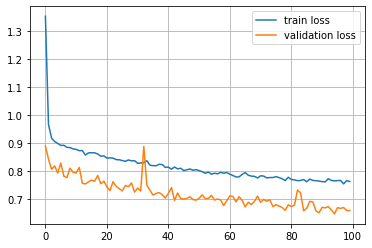

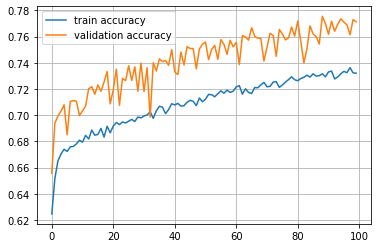

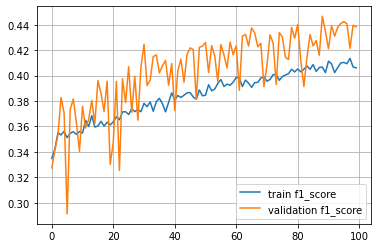

In [34]:
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### 과적합은 어느정도 해결된듯 보이나 학습률이 너무 낮음
### 학습 횟수를 늘리거나 모델을 더 복잡하게 짜야겠음

### dropout 비율 0.5 conv kernel size 32 dense 64 model2

In [63]:
model.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 60, 1)]      0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 25, 1)]      0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 65, 1)]      0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 145, 1)]     0                                            
___________________________________________________________________________________________

In [64]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train, df9_x_train, df10_x_train, df11_x_train, df12_x_train,
                 df13_x_train, df14_x_train, df15_x_train, df16_x_train], y_train,
                 epochs=100, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, df9_x_valid, df10_x_valid,
                                                df11_x_valid, df12_x_valid, df13_x_valid, df14_x_valid, df15_x_valid,
                                                df16_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
735/735 [==============================] - 29s 34ms/step - loss: 1.3797 - accuracy: 0.6219 - f1_score: 0.3370 - val_loss: 0.9568 - val_accuracy: 0.6580 - val_f1_score: 0.2801
Epoch 2/100
735/735 [==============================] - 24s 33ms/step - loss: 0.9624 - accuracy: 0.6545 - f1_score: 0.3505 - val_loss: 0.8918 - val_accuracy: 0.6718 - val_f1_score: 0.3434
Epoch 3/100
735/735 [==============================] - 23s 32ms/step - loss: 0.9114 - accuracy: 0.6656 - f1_score: 0.3562 - val_loss: 0.8543 - val_accuracy: 0.6879 - val_f1_score: 0.3608
Epoch 4/100
735/735 [==============================] - 24s 32ms/step - loss: 0.9002 - accuracy: 0.6702 - f1_score: 0.3593 - val_loss: 0.8579 - val_accuracy: 0.6795 - val_f1_score: 0.3257
Epoch 5/100
735/735 [==============================] - 24s 32ms/step - loss: 0.8965 - accuracy: 0.6739 - f1_score: 0.3630 - val_loss: 0.8499 - val_accuracy: 0.6995 - val_f1_score: 0.3882
Epoch 6/100
735/735 [==============================] - 24s 33ms/s

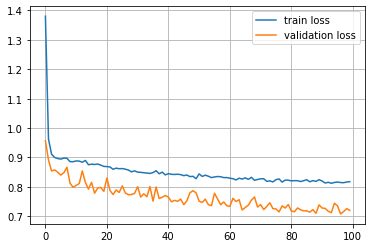

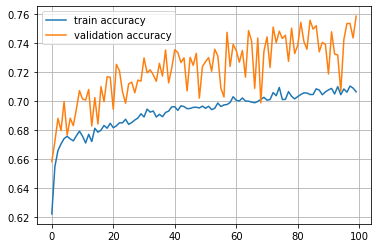

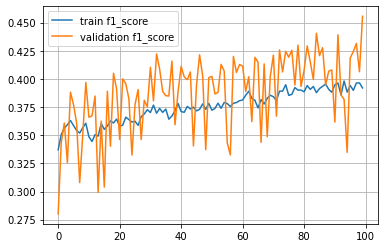

In [65]:
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### train dataset을 가지고 아예 학습이 되고 있지 않아 validation dataset 비율을 줄여
### train data의 양을 늘리고, dense layer의 노드 개수 32로 조정

In [104]:
model.summary()

Model: "model_53"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           [(None, 60, 1)]      0                                            
__________________________________________________________________________________________________
input_34 (InputLayer)           [(None, 25, 1)]      0                                            
__________________________________________________________________________________________________
input_35 (InputLayer)           [(None, 65, 1)]      0                                            
__________________________________________________________________________________________________
input_36 (InputLayer)           [(None, 145, 1)]     0                                            
___________________________________________________________________________________________

In [105]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train, df9_x_train, df10_x_train, df11_x_train, df12_x_train,
                 df13_x_train, df14_x_train, df15_x_train, df16_x_train], y_train,
                 epochs=100, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid, df9_x_valid, df10_x_valid,
                                                df11_x_valid, df12_x_valid, df13_x_valid, df14_x_valid, df15_x_valid,
                                                df16_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
840/840 [==============================] - 31s 31ms/step - loss: 1.2206 - accuracy: 0.6179 - f1_score: 0.3205 - val_loss: 0.9114 - val_accuracy: 0.6412 - val_f1_score: 0.2672
Epoch 2/100
840/840 [==============================] - 25s 30ms/step - loss: 0.9729 - accuracy: 0.6481 - f1_score: 0.3245 - val_loss: 0.8730 - val_accuracy: 0.6693 - val_f1_score: 0.3235
Epoch 3/100
840/840 [==============================] - 25s 30ms/step - loss: 0.9542 - accuracy: 0.6513 - f1_score: 0.3216 - val_loss: 0.8555 - val_accuracy: 0.6634 - val_f1_score: 0.2878
Epoch 4/100
840/840 [==============================] - 25s 30ms/step - loss: 0.9596 - accuracy: 0.6487 - f1_score: 0.3187 - val_loss: 0.8980 - val_accuracy: 0.6830 - val_f1_score: 0.3457
Epoch 5/100
840/840 [==============================] - 26s 31ms/step - loss: 0.9581 - accuracy: 0.6489 - f1_score: 0.3180 - val_loss: 0.8548 - val_accuracy: 0.6754 - val_f1_score: 0.3189
Epoch 6/100
840/840 [==============================] - 25s 30ms/s

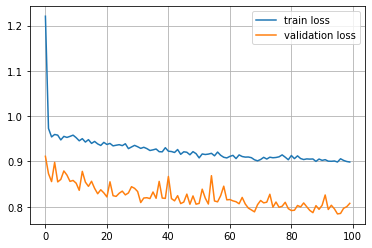

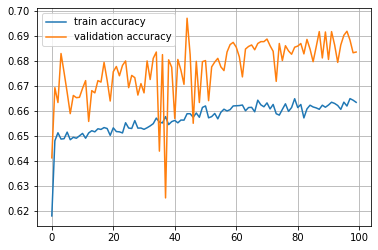

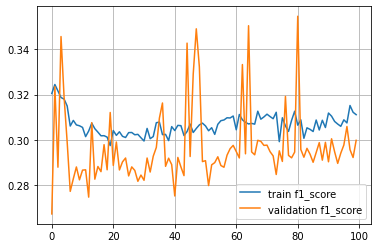

In [106]:
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### 구간을 너무 세밀하게 나눠 뚜렷한 특징을 잘 못잡아냄
### 구간을 더 넓게 잡아 큰 범위에서의 특징을 잡아내야 함